      Unnamed: 0    id state region  transfer  pop82  literate92  educ80  \
0              0    60    AC      N       1.0  19613    0.477099     1.0   
1              1    65    AC      N       0.0   9343    0.718631     0.9   
2              2    70    AC      N       0.0   9728    0.732984     0.8   
3              3    71    AC      N       1.0  23592    0.552023     1.0   
4              4    73    AC      N       1.0  14701    0.689840     1.5   
...          ...   ...   ...    ...       ...    ...         ...     ...   
1781        1781  5540    GO     CO       1.0  11358    0.897674     2.4   
1782        1782  5543    GO     CO       1.0  19807    0.942466     2.1   
1783        1783  5546    GO     CO       0.0   9172    0.938462     1.9   
1784        1784  5556    GO     CO       0.0  12788    0.904412     2.7   
1785        1785  5560    GO     CO       0.0   7929    0.925258     2.5   

        educ91  poverty80  poverty91  
0     2.480469     0.7950    0.75124  
1     3.2

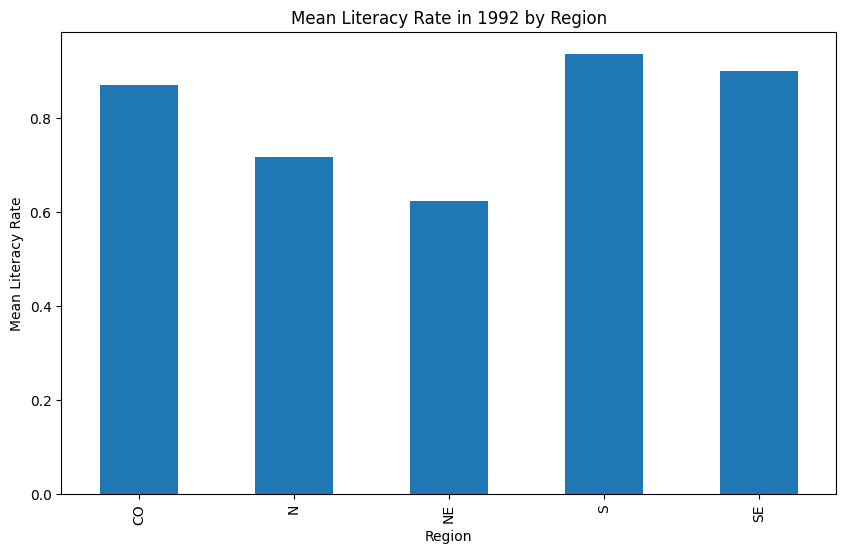


Question 8:


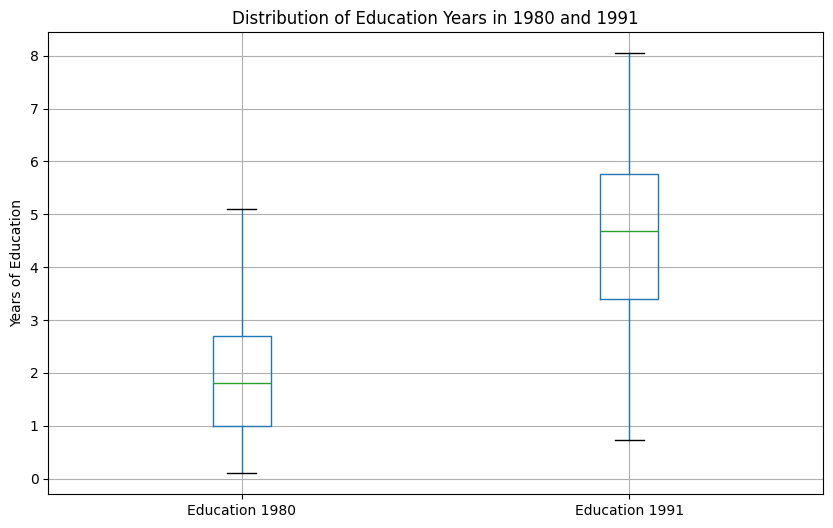


Question 9:


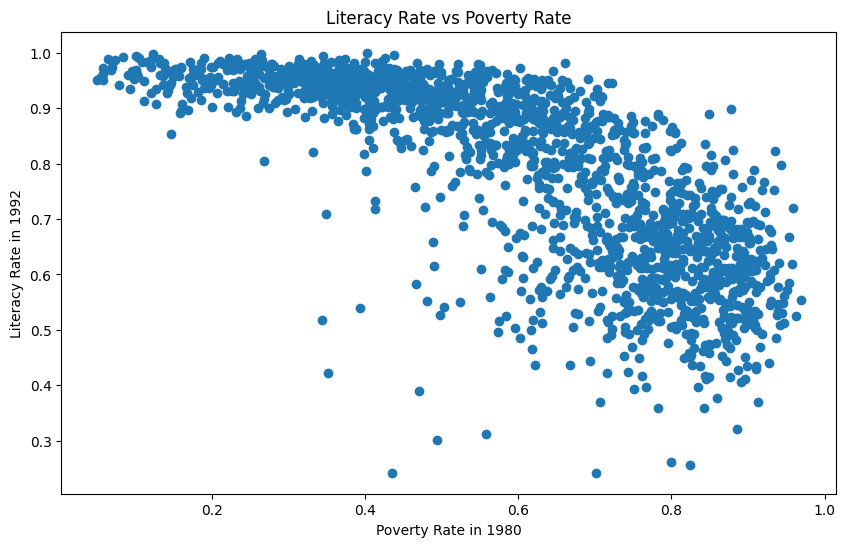


Question 10:


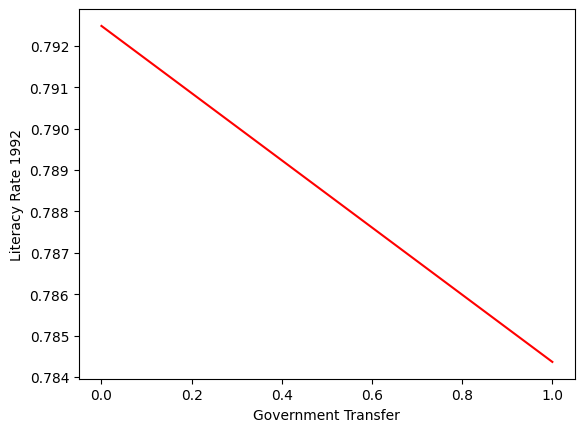

Simple Regression Interpretation:
Constant: 0.79 - Expected literacy rate without transfers
Transfer coefficient: -0.01 - Change in literacy rate for each unit of transfer

Question 11:


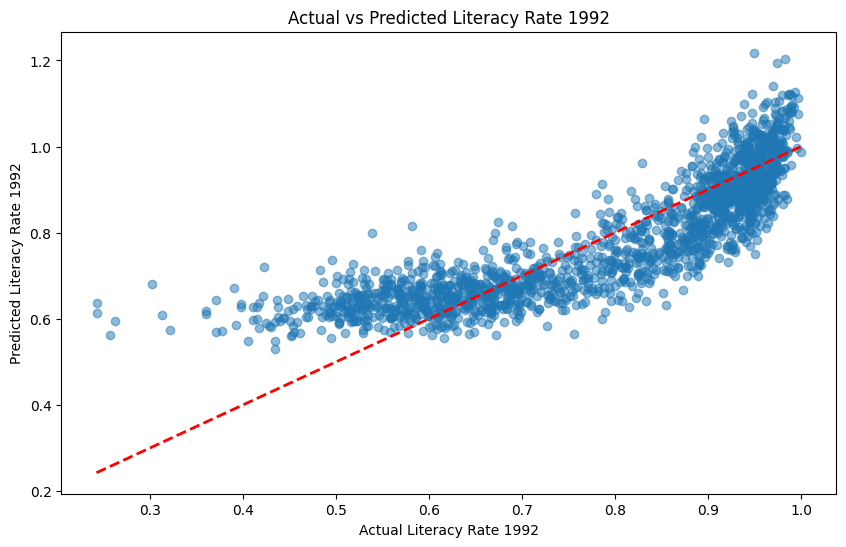


Multiple Regression Interpretation:
Transfer coefficient: -0.01 - Change in literacy rate for each unit of transfer, holding other factors constant

Question 12:


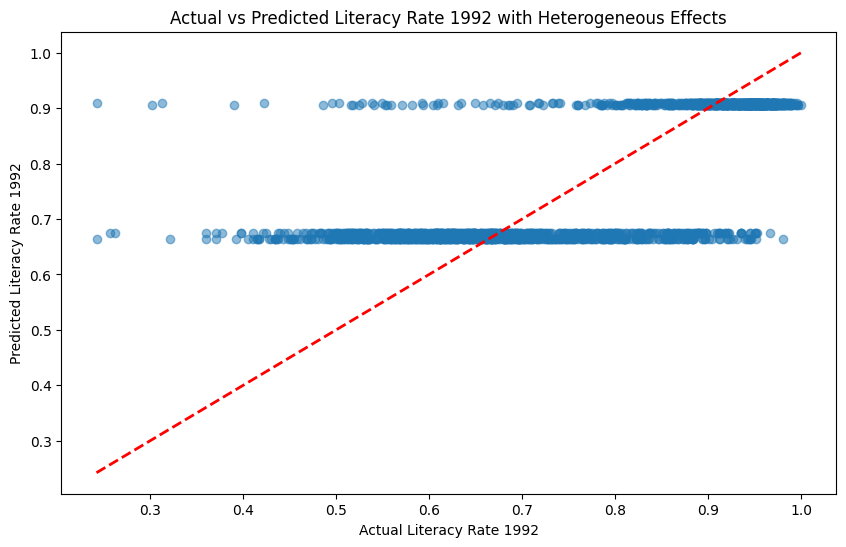

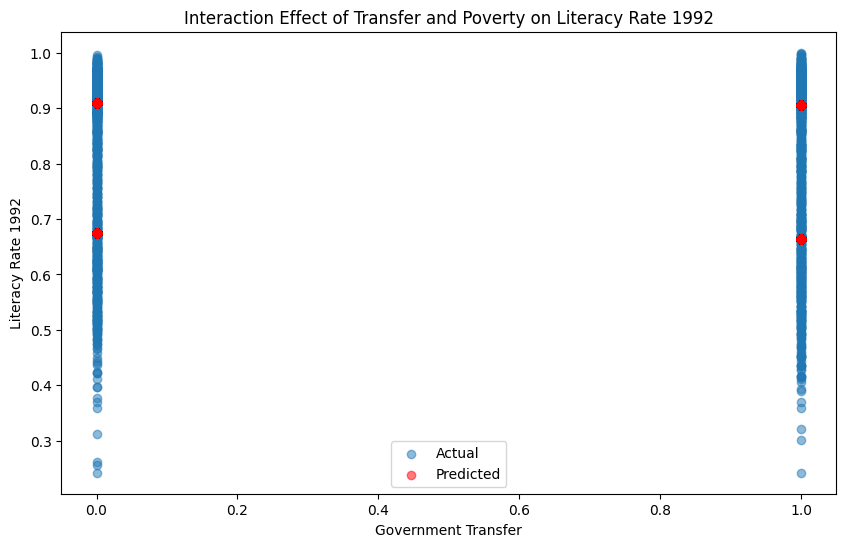


Heterogeneous Effects Interpretation:
Transfer effect for non-poor: -0.00
Additional transfer effect for poor: -0.01
Total transfer effect for poor: -0.01

Question 13:
                            OLS Regression Results                            
Dep. Variable:     Literacy Rate 1992   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.588
Date:                Fri, 02 Aug 2024   Prob (F-statistic):            0.00332
Time:                        21:05:21   Log-Likelihood:                 696.75
No. Observations:                1786   AIC:                            -1386.
Df Residuals:                    1782   BIC:                            -1364.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

data=pd.read_csv('C:\\Users\\THINKPAD\\Downloads\\transfer_brazil.csv')
print(data)

print(f"Number of observations: {data.shape[0]}")
print(data.dtypes)

print(f"Number of observations: {len(data)}")

new_column_names = {
    'id': 'Municipal ID',
    'state': 'State',
    'region': 'Major region',
    'transfer': 'Transfer',
    'pop82': 'Population 1982',
    'literate92': 'Literacy Rate 1992',
    'educ80': 'Education 1980',
    'educ91': 'Education 1991',
    'poverty80': 'Poverty Rate 1980',
    'poverty91': 'Poverty Rate 1991'
}

# Q1 Rename the columns
print("\nQuestion 1:")
data = data.rename(columns=new_column_names)
print(data.head())

print("\nAll column names:")
print(data.columns.tolist())

#Q2 Count string (object) and numeric columns
print("\nQuestion 2:")
string_columns = data.select_dtypes(include=['object']).columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
print(f"Total number of variables: {len(data.columns)}")
print(f"Number of string variables: {len(string_columns)}")
print(f"Number of numeric variables: {len(numeric_columns)}")

# Print the names of string and numeric variables
print("\nString variables:")
print(list(string_columns))
print("\nNumeric variables:")
print(list(numeric_columns))


# Q3 Count variables with missing values
print("\nQuestion 3:")
data = data.rename(columns=new_column_names)

# Check for missing values
missing_values = data.isnull().sum()
print("Variables with missing values:") # Print results
for column, count in missing_values.items():
    if count > 0:
        print(f"{column}: {count} missing values")

# If there are no missing values
if missing_values.sum() == 0:
    print("There are no missing values in any of the variables.")

# Total number of missing values
total_missing = missing_values.sum()
print(f"\nTotal number of missing values across all variables: {total_missing}")


# Print summary of missing values
print("\nSummary of missing values:")
print(data.isnull().sum().to_string())

print("Question 4:")

# Check if all regions are represented
regions = ['N', 'NE', 'CO', 'SE', 'S']
represented_regions = data['Major region'].unique()
all_regions_represented = all(region in represented_regions for region in regions)

print(f"Are all five regions represented? {all_regions_represented}")

# Count municipalities in each region
region_counts = data['Major region'].value_counts().sort_index()
print("\nNumber of municipalities in each region:")
for region, count in region_counts.items():
    print(f"{region}: {count}")

# Question 5
print("\nQuestion 5:")

# Calculate mean, median, and standard deviation of population
mean_population = data['Population 1982'].mean()
median_population = data['Population 1982'].median()
std_population = data['Population 1982'].std()

print(f"Mean population: {mean_population:.2f}")
print(f"Median population: {median_population:.2f}")
print(f"Standard deviation of population: {std_population:.2f}")


# 6. Define large_pop variable
print("\nQuestion 6:")
pop_column = 'Population 1982'  # Adjust this if the column name is different
q25, q75 = data[pop_column].quantile([0.25, 0.75])
data['large_pop'] = np.where(data[pop_column] > q75, 1, np.where(data[pop_column] < q25, 0, np.nan))
print(data)


# 7. Bar plot of mean literacy rate across regions
print("\nQuestion 7:")
plt.figure(figsize=(10, 6))
data.groupby('Major region')['Literacy Rate 1992'].mean().plot(kind='bar')
plt.title('Mean Literacy Rate in 1992 by Region')
plt.xlabel('Region')
plt.ylabel('Mean Literacy Rate')
plt.show()


# 8. Box plot for education years
print("\nQuestion 8:")
plt.figure(figsize=(10, 6))
data[['Education 1980', 'Education 1991']].boxplot()
plt.title('Distribution of Education Years in 1980 and 1991')
plt.ylabel('Years of Education')
plt.show()

# 9. Scatter plot for literacy rate and poverty rate
print("\nQuestion 9:")
plt.figure(figsize=(10, 6))
plt.scatter(data['Poverty Rate 1980'], data['Literacy Rate 1992'])
plt.xlabel('Poverty Rate in 1980')
plt.ylabel('Literacy Rate in 1992')
plt.title('Literacy Rate vs Poverty Rate')
plt.show()

# Identify numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    data[col] = data[col].fillna(data[col].mean())


# 10. Simple regression
print("\nQuestion 10:")
X = sm.add_constant(data['Transfer'])
model_simple = sm.OLS(data['Literacy Rate 1992'], X).fit()
predictions = model_simple.predict(X)
plt.plot(data['Transfer'], predictions, color='red')

plt.xlabel('Government Transfer')
plt.ylabel('Literacy Rate 1992')
plt.show()
# Print interpretations
print("Simple Regression Interpretation:")
print(f"Constant: {model_simple.params['const']:.2f} - Expected literacy rate without transfers")
print(f"Transfer coefficient: {model_simple.params['Transfer']:.2f} - Change in literacy rate for each unit of transfer")


# 11. Multiple regression
print("\nQuestion 11:")
X = sm.add_constant(data[['Transfer', 'Population 1982', 'Poverty Rate 1980', 'Education 1980']])
y = data['Literacy Rate 1992']

# Fit the multiple regression model
model_multiple = sm.OLS(y, X).fit()

# Predict values
predictions = model_multiple.predict(X)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, alpha=0.5)
plt.xlabel('Actual Literacy Rate 1992')
plt.ylabel('Predicted Literacy Rate 1992')
plt.title('Actual vs Predicted Literacy Rate 1992')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)  # Line y=x for reference
plt.show()

print("\nMultiple Regression Interpretation:")
print(f"Transfer coefficient: {model_multiple.params['Transfer']:.2f} - Change in literacy rate for each unit of transfer, holding other factors constant")


#  12. Heterogeneous effects for poor vs non-poor municipalities
print("\nQuestion 12:")
data['poor'] = (data['Poverty Rate 1980'] > data['Poverty Rate 1980'].median()).astype(int)
data['Transfer_poor'] = data['Transfer'] * data['poor']

# Define the predictors and the response variable
X = sm.add_constant(data[['Transfer', 'poor', 'Transfer_poor']])
y = data['Literacy Rate 1992']

# Fit the model
model_hetero = sm.OLS(y, X).fit()

# Predict values
predictions = model_hetero.predict(X)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, alpha=0.5)
plt.xlabel('Actual Literacy Rate 1992')
plt.ylabel('Predicted Literacy Rate 1992')
plt.title('Actual vs Predicted Literacy Rate 1992 with Heterogeneous Effects')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)  # Line y=x for reference
plt.show()

# Plotting the interaction effect
plt.figure(figsize=(10, 6))
plt.scatter(data['Transfer'], y, alpha=0.5, label='Actual')
plt.scatter(data['Transfer'], predictions, alpha=0.5, label='Predicted', color='red')
plt.xlabel('Government Transfer')
plt.ylabel('Literacy Rate 1992')
plt.title('Interaction Effect of Transfer and Poverty on Literacy Rate 1992')
plt.legend()
plt.show()


print("\nHeterogeneous Effects Interpretation:")
print(f"Transfer effect for non-poor: {model_hetero.params['Transfer']:.2f}")
print(f"Additional transfer effect for poor: {model_hetero.params['Transfer_poor']:.2f}")
print(f"Total transfer effect for poor: {model_hetero.params['Transfer'] + model_hetero.params['Transfer_poor']:.2f}")


# Q13.Heterogeneous impacts by large_pop
print("\nQuestion 13:")
data['Transfer_large_pop'] = data['Transfer'] * data['large_pop']

# Define the predictors and the response variable
X = sm.add_constant(data[['Transfer', 'large_pop', 'Transfer_large_pop']])
y = data['Literacy Rate 1992']
model_hetero_large_pop = sm.OLS(y, X).fit()  # Fit the model
print(model_hetero_large_pop.summary())

# Determine the impact of transfers in large vs small municipalities
print("Impact of transfers in large municipalities:", model_hetero_large_pop.params['Transfer'] + model_hetero_large_pop.params['Transfer_large_pop'])
print("Impact of transfers in small municipalities:", model_hetero_large_pop.params['Transfer'])


# Q14. Transform data to state level
print("\nQuestion 14:")
numeric_cols = data.select_dtypes(include='number').columns  # Identify numeric columns
state_data = data.groupby('State')[numeric_cols].mean().reset_index()

print(state_data.shape)  # Should have 25 observations (one for each state)
print(state_data.head())  # Display the first few rows to verify
state_data.to_csv('C:\\Users\\THINKPAD\\Desktop\\transformed_state_data.csv', index=False) # Save the transformed dataset to a new file if needed

# Q15. Reshape data
print("\nQuestion 15:")
id_columns = ['State']  # Replace with actual identifier column if different
value_columns = ['Transfer', 'Population 1982', 'Poverty Rate 1980', 'Education 1980', 'Literacy Rate 1992']
long_data = pd.melt(data, id_vars=id_columns, value_vars=value_columns, var_name='variable', value_name='value') # Create a new DataFrame with the year extracted from the column names
print(long_data.shape)# Verify the number of observations
print(long_data.head())# Print the reshaped dataset